<a href="https://datamics.com/de/courses/"><img src=../DATA/bg_datamics_top.png></a>

<em text-align:center>© Datamics</em>
# Finanzdaten Projekt

In diesem Datenprojekt werden wir uns auf die Analyse von Aktienpreise konzentrieren. Denkt dabei daran, dass es hier primär um die Visualisierungs- und Analysefähigkeiten geht, nicht daraum verlässliche Finanzanalysen durchzuführen.

**Achtung**: Dieses Projekt wird eine große Herausforderung weil es eine Menge neuer Konzepte einführt, die ihr selbst recherchieren müsst. Nichtsdestotrotz werden wir die notwendigen Hinweise geben. Dabei sei es jedem freigestellt parallel ins Lösungsnotebook oder das Video-Material zu schauen und dieses Projekt als "Walkthrough" zu lösen.

Wir werden uns nun also Bankaktien anschauen und wie sie sich seit der Finanzkrise bis Anfang 2016 entwickelt haben.

## Die Daten

In dieser Sektion werden wir lernen, wie wir mit Pandas direkt Daten aus Google Fiance lesen können.

Zuerst müssen wir demnach einige Imports machen, welche im Rahmen dieses Projektes gegeben sind.

*Hinweis: Zum korrekten Auslesen der Finanzdaten müssen wir noch den [pandas-datareader](https://github.com/pydata/pandas-datareader) installieren:*

    conda install pandas-datareader

### Die Importe

*Bereits ausgefüllt:*

In [1]:
%pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [97]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline

### Daten

Wir können die Daten durch verwendung des *Pandas Datareader* erhalten. Dieser liefert uns Aktieninformationen zu den folgenden Banken:

* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

**Finde nun heraus, wie du die Aktiendaten vom 5 Jahren zurück bis heute für jede dieser Banken erhälst. Erstelle dazu für jede Bank einen eigenen DataFrame. Die Namen dieser DataFrames sollen dem Ticker Symbol (z.B.: BAC für Bank of America) entsprechen. Das alles benötigt einige Schritte:**

1. Nutze `datetime`, um Start und Ende Objekte zu erstellen.
2. Finde das Ticker Symbol für jede Bank heraus.
3. Finde heraus, wie du den datareader nutzen kannst, um die Informationen zu erhalten.

**Nutze diese [Dokumentationsseite](http://pandas.pydata.org/pandas-docs/stable/ecosystem.html) für Hinweise und Tipps. Es sollte dabei nur um das richtige Ersetzen bestimmter Daten gehen. Nutze "Stooq.com" als Quelle. Zum Beispiel:**

    # Bank of America
    BAC = data.DataReader("BAC","stooq",start,end)

In [122]:
# Achtung die Parameter für start und end haben leider in der aktuellen pandas-datareader Version einen Bug.
start = datetime(2006, 1, 1)
end = datetime(2017, 1, 1)

In [119]:
# Bank of America - BAC
BAC = data.DataReader("BAC", 'stooq', start, end)

# CitiGroup - C 
C = data.DataReader("C", 'stooq', start, end)

# Goldman Sachs - GS
GS = data.DataReader("GS", 'stooq', start, end)

# JPMorgan Chase - JPM
JPM = data.DataReader("JPM", 'stooq', start, end)

# Morgan Stanley - MS
MS = data.DataReader("MS", 'stooq', start, end)

# Wells Fargo - WFC
WFC = data.DataReader("WFC", 'stooq', start, end)

In [5]:
# Alternative: Nutzung eines Panel-Objekts
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'stooq', start, end)

**Erstelle eine Liste der Ticker Symbole (als String) in alphabetischer Reihenfolge. Nenne diese Liste "tickers".**

In [6]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

**Nutze `pd.concat`, um die einzelnen DataFrames zu einem Banken-DataFrame namens "bank_stocks" zusammenzufassen. Setze dabei das Keys (dt. Schlüssel) Argument gleich der tickers-Liste.**

*Hinweis: Achte auf die Achse auf die du `concat` anwendest.*

In [7]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

**Definiere die Spalten namen (bereits vorausgefüllt).**

In [8]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

**Schaue dir den head des bank_stocks DataFrame an.**

In [9]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2019-11-22   32.96  33.32  32.94  33.18  38783867  74.10  74.92  73.97  74.87   
2019-11-21   32.78  33.04  32.63  32.84  42787633  74.08  74.63  73.51  73.90   
2019-11-20   32.79  32.83  32.42  32.69  43618135  74.63  74.72  73.22  73.91   
2019-11-19   33.12  33.15  32.82  32.94  33195390  74.97  75.24  74.47  74.82   
2019-11-18   32.86  33.03  32.75  32.96  31146277  74.29  74.64  73.56  74.40   

Bank Ticker            ...     MS                                   WFC  \
Stock Info     Volume  ...   Open    High    Low  Close   Volume   Open   
Date                   ...                                                
2019-11-22    7910668  ...  48.94  49.255  48.82  49.25  6609776  53.90   
2019-11-21    8585096  ...  49.25  49.340  48.73  48.84  8353623  53.84   
2019-11-20   12801442  ...  48.96  49.110  48.39  49.10  9138743  53.73   
2019-11-19    9096818  ...  49.22  49.600  49.21  49.33  6980321  54.10   
2019-11-18    8526789  ...  48.84  49.085  48.56  49.03  6447878  53.84   

Bank Ticker                                   
Stock Info     High     Low  Close    Volume  
Date                                          
2019-11-22   54.350  53.805  54.28  13823402  
2019-11-21   53.930  53.340  53.56  16186126  
2019-11-20   53.860  53.250  53.54  14994768  
2019-11-19   54.329  53.870  54.03  14436526  
2019-11-18   54.110  53.650  54.00  14374870  

[5 rows x 30 columns]

## Explorative Datenanalyse

Lasst uns die Daten etwas untersuchen! Doch bevor wir damit loslegen ermutige ich euch, das [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) und die [Nutzung von .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) genauer anzuschauen.

**Was ist der maximale Kurs zum Handelsschluss (en. close price) für jede der Banken in unserer gesamten Zeitperiode?**

In [10]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     33.260
C       76.177
GS     266.450
JPM    130.790
MS      56.250
WFC     61.586
dtype: float64

**Erstelle einen neuen leeren DataFrame namens "returns" (dt. Rendite). Dieser DataFrame wird die Renditen für die Aktien der Banken beinhalten. Renditen sind typischerweise wie folgt definiert:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [11]:
returns = pd.DataFrame()

**Wir können nun Pandas `pct_change()` Methode auf den Schlusskurs anwenden, um eine Spalte zu erzeugen, die die Renditen beinhaltet. Erstelle dazu eine `for` Schleife, die für jeden Bank Aktienticker diese Renditenspalte erzeugt und sie in unseren returns DataFrame schreibt.**

In [12]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2019-11-22,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-21,-0.010247,-0.012956,-0.009306,-0.006575,-0.008325,-0.013265
2019-11-20,-0.004568,0.000135,-0.001466,-0.002309,0.005324,-0.000373
2019-11-19,0.007648,0.012312,0.009775,0.007329,0.004684,0.009152
2019-11-18,0.000607,-0.005613,-0.001409,0.000306,-0.006081,-0.000555


**Erstelle jetzt ein `pairplot` mit Seaborn vom returns DataFrame. Welche Aktien stechen heraus? Woran könnte das liegen?**

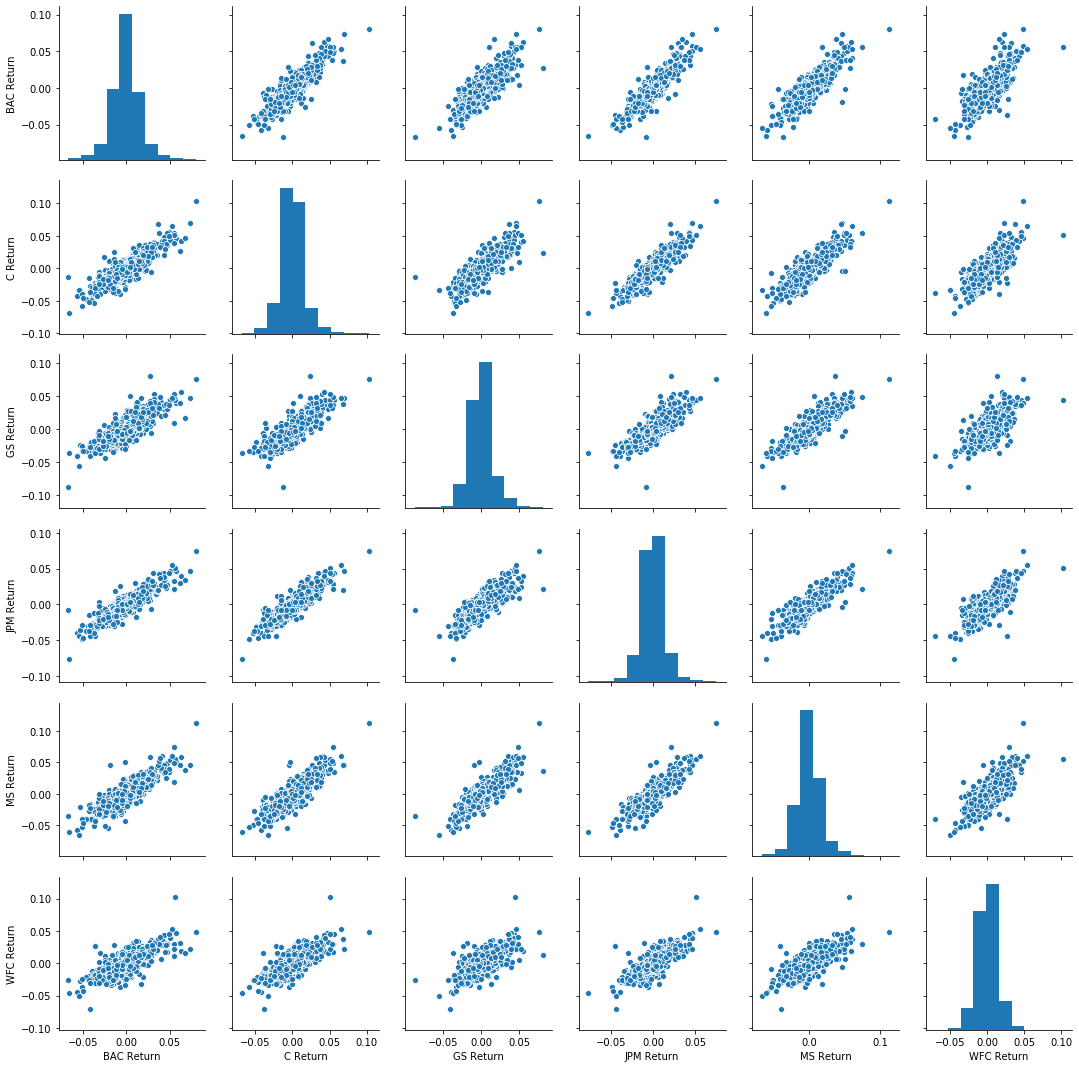

In [13]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])

Hintergrundinformationen zum Crash der Citigroup Aktie gibts [hier](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29).

Man sieht außerdem einen enormen Crash im Wert der Aktien (was wir bei den Visualisierungen später noch tun werden).

**Unter Verwendung des return DataFrame: finde heraus an welchem Tag die jeweiligen Banken die besten und schlechtesten Eintagesrenditen hatten. Dabei sollte dir auffallen, dass 4 der Banken ihren schlechtesten am selben Tag hatte. Was passierte an diesem Tag?**

In [14]:
returns.idxmin() # Inauguration Day in den USA

BAC Return   2019-01-15
C Return     2016-02-11
GS Return    2019-01-15
JPM Return   2016-02-11
MS Return    2016-11-08
WFC Return   2016-11-09
dtype: datetime64[ns]

In [15]:
returns.idxmax()

BAC Return   2016-06-23
C Return     2016-06-23
GS Return    2018-11-09
JPM Return   2016-06-23
MS Return    2016-06-23
WFC Return   2018-02-02
dtype: datetime64[ns]

**Dabei sollte aufgefallen sein, dass der größte Einbruch und Gewinn der Citigroup nahe zusammen liegen. Ist etwas signifikantes passiert?**

[Citigroup had a stock split.](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=citigroup+stock+2011+may)

**Betrachte jetzt die Standardabweichung der Renditen. Welche Aktie würdest du demnach als die riskanteste über den gesamten Zeitraum hinweg bezeichnen? Welche würdest du als riskanteste im Jahr 2016 bezeichnen?**

In [16]:
returns.std()

BAC Return    0.016283
C Return      0.015809
GS Return     0.015057
JPM Return    0.013283
MS Return     0.016689
WFC Return    0.013311
dtype: float64

In [84]:
returns.loc['2018'].head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2018-12-31,-0.012837,-0.027454,-0.028966,-0.017019,-0.018594,-0.018326
2018-12-28,-0.010114,-0.004425,-0.024119,-0.008092,-0.007059,-0.006478
2018-12-27,-0.000834,-0.001151,0.014630,0.002151,0.007371,-0.005498
2018-12-26,-0.010644,-0.006397,-0.015033,-0.011116,-0.009056,0.001325
2018-12-24,-0.057250,-0.042366,-0.040366,-0.039815,-0.058286,-0.043646


**Erstelle ein `distplot` mit Seaborn für die Renditen von Morgan Stranley in 2016.**

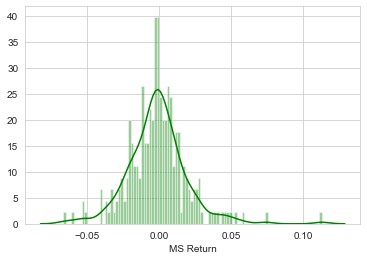

In [85]:
sns.distplot(returns.loc['2016']['MS Return'],color='green',bins=100)

**Erstelle ein `distplot` mit Seaborn für die Renditen der CitiGroup in 2015.**

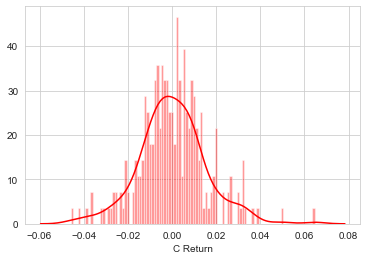

In [123]:
sns.distplot(returns.loc['2015']['C Return'],color='red',bins=100)

## Mehr Visualisierungen

Der folgende Teil dieses Projekts dreht sich komplett um Visualisierungen.  Nutze dabei eine Library deiner Wahl, oder mehrere. Ziel ist es, die abgebildeten Visualisierungen nachzustellen. Wähle zwischen Seaborn, Matplotlib, Plotly, Cufflinks oder einfach Pandas.

### Importe

In [ ]:
# Installieren die neuste cufflinks Version, weil wir plot
%pip install cufflinks==0.17.0

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports

import chart_studio.plotly as py
from chart_studio.plotly import plot
import cufflinks as cf
cf.go_offline()

**Erstelle ein Liniendiagramm, das die Tagesschlusspreise für jede Bank für die gesamte Zeitperiode zeigt.**

*Hinweis: Eine `for` Schleife oder .xs können funktionieren.*

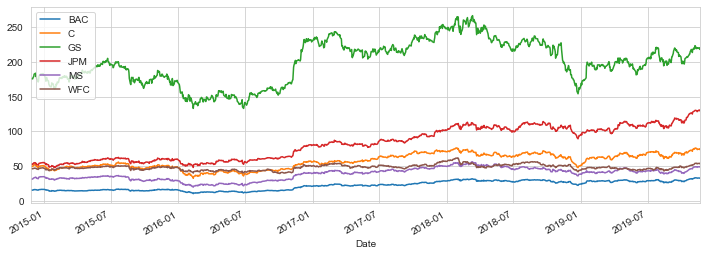

In [23]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

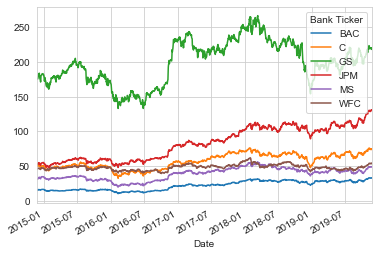

In [25]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [24]:
# Plotly
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

### Laufender Durchschnitt

Lasst uns den laufenden Durchschnitt für diese Aktien im Jahr 2014 berechnen.

**Zeichne den laufenden 30-Tages-Durchschnitt gegen den Tagesschlusspreis für die Bank of America im Jahr 2014.**

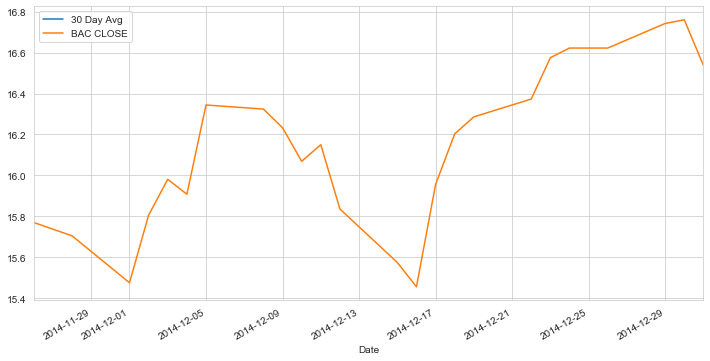

In [89]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2014'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2014'].plot(label='BAC CLOSE')
plt.legend()

**Erstelle eine `heatmap` der Korrelation zwischen den Schlusspreisen der Banken.**

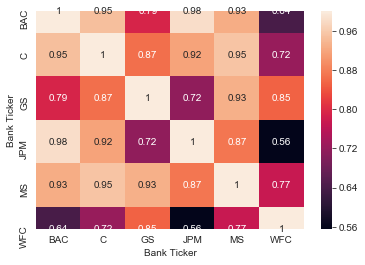

In [90]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

**Optional: Nutze die `clustermap` aus Seaborn, um die Korrelationen zu clustern.**

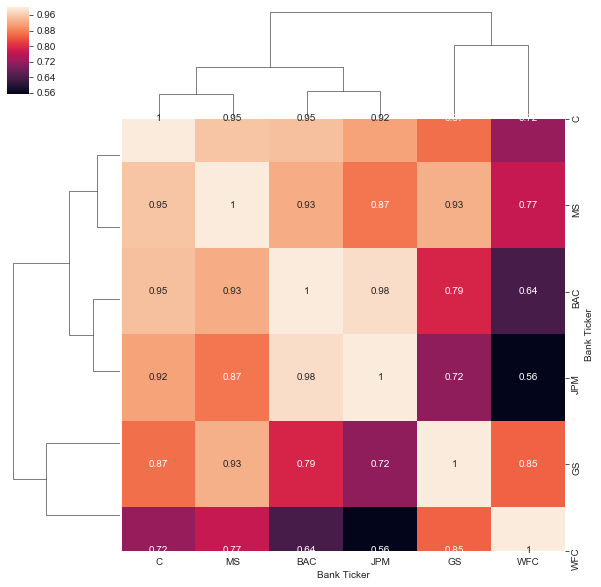

In [28]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [91]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# Gut gemacht!